In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
data = pd.read_excel('AirQualityUCI.xlsx')

Hypothesis 1: There is a significant positive correlation between CO levels (CO(GT)) and benzene levels (C6H6(GT)) since they are both common pollutants from combustion sources.

Hypothesis 2: Temperature (T) has a significant effect on the concentration of pollutants, with higher temperatures potentially leading to lower pollutant concentrations due to increased dispersion.

Hypothesis 3: There is a daily pattern in CO levels, with higher concentrations during rush hours (morning and evening).

=== Basic Info ===
Shape: (6941, 19)

Data Types:
Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
DateTime         datetime64[ns]
Month                     int32
Hour                      int32
Weekday                    bool
dtype: object

Missing Values:
Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)         6114
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH 

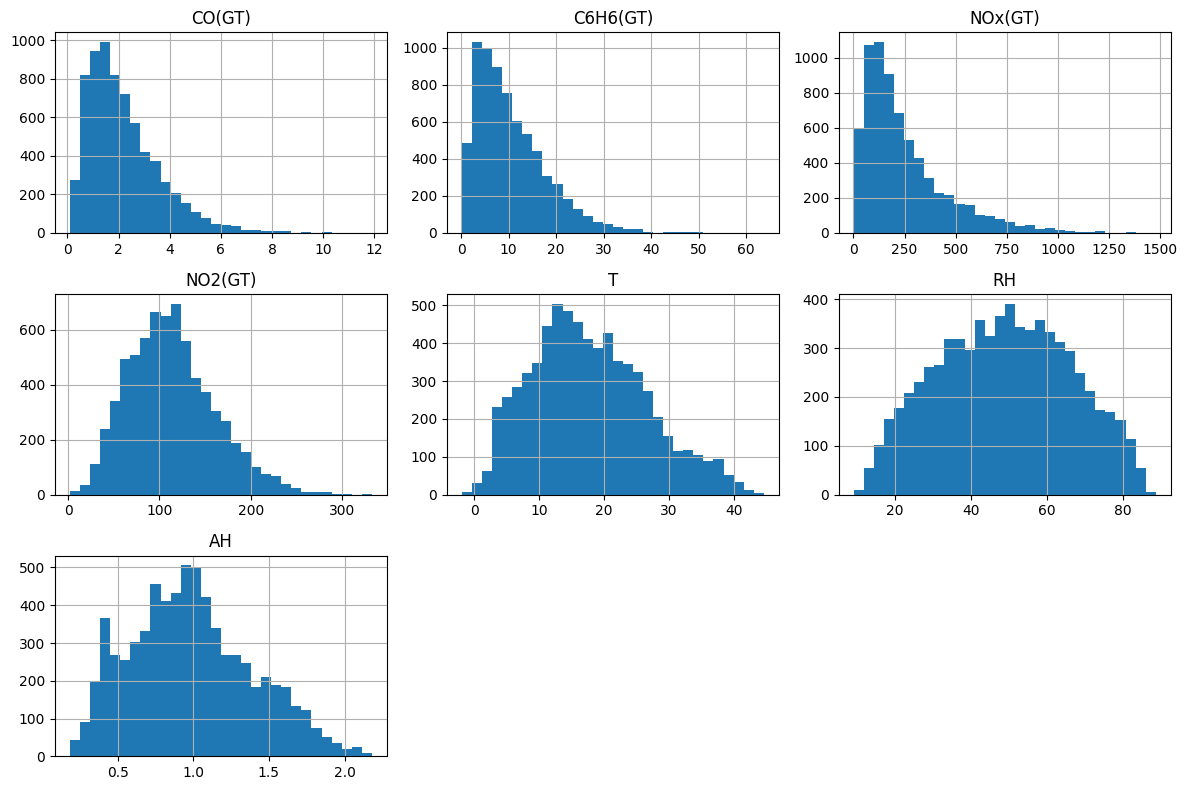

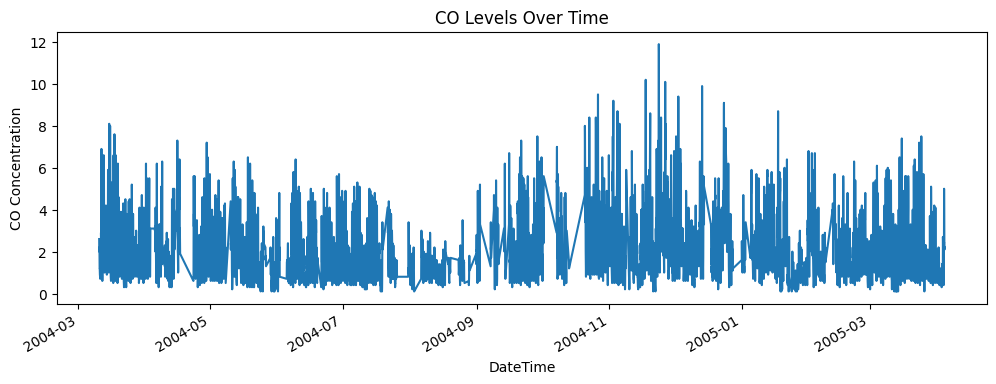

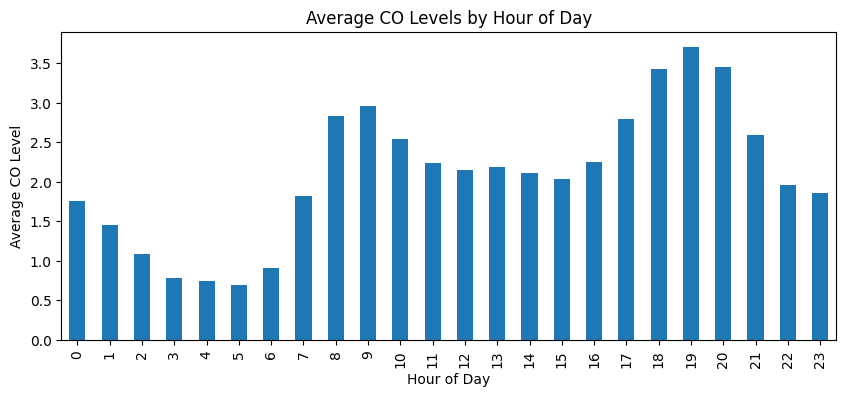

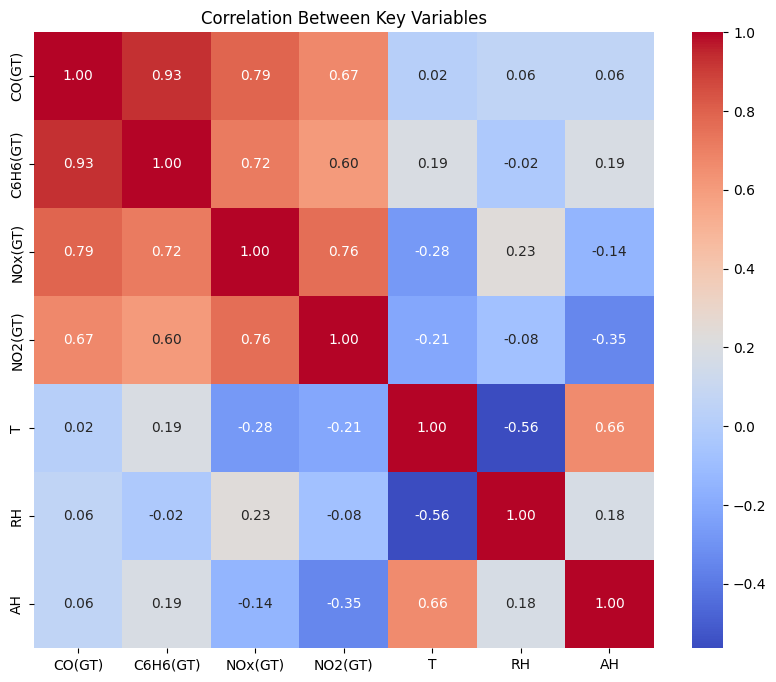

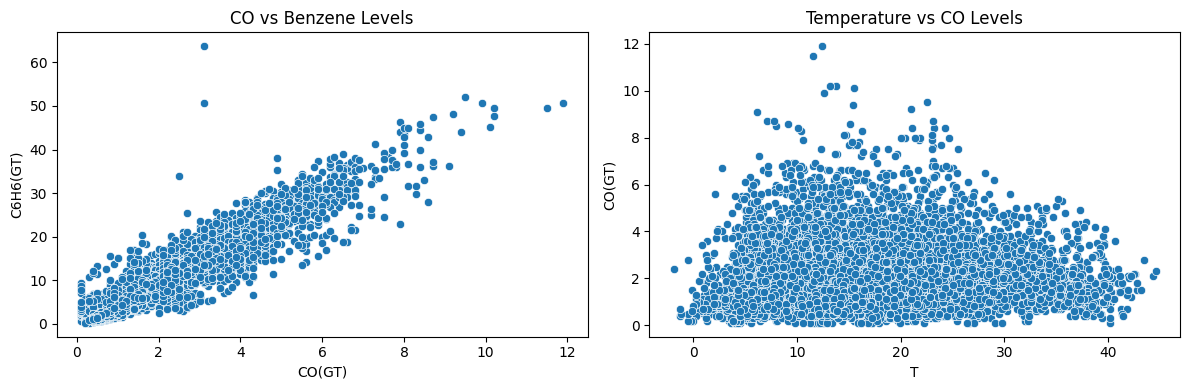

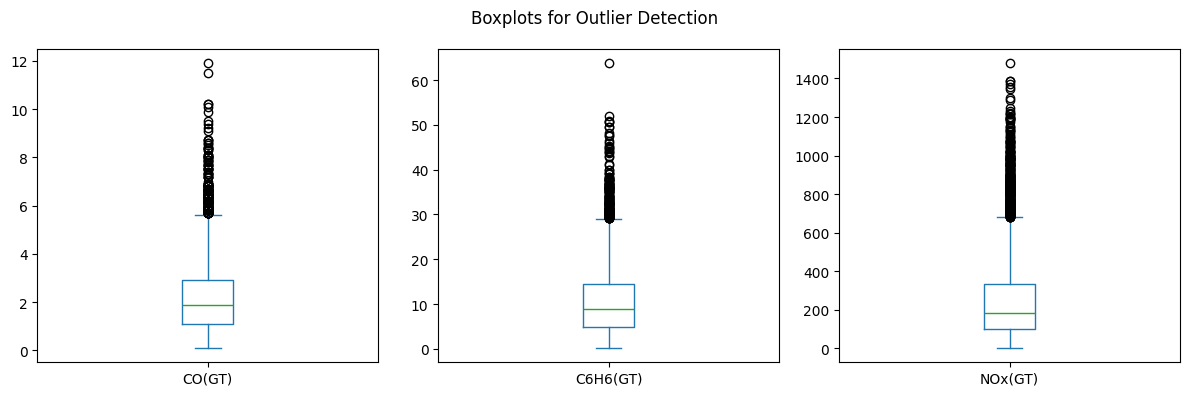

In [24]:
#Basic EDA and data cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
data.replace(-200, np.nan, inplace=True)
data.dropna(subset=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH'], inplace=True)

# Combine date and time
data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))

# Basic info
print("=== Basic Info ===")
print(f"Shape: {data.shape}")
print("\nData Types:")
print(data.dtypes)
print("\nMissing Values:")
print(data.isnull().sum())

# Summary stats
print("\n=== Summary Statistics ===")
print(data.describe())

# Plot distributions for key variables
key_vars = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']
data[key_vars].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Time series of CO levels
plt.figure(figsize=(12, 4))
data.set_index('DateTime')['CO(GT)'].plot(title='CO Levels Over Time')
plt.ylabel('CO Concentration')
plt.show()

# Hourly pattern of CO
hourly_co = data.groupby(data['DateTime'].dt.hour)['CO(GT)'].mean()
hourly_co.plot(kind='bar', figsize=(10, 4), title='Average CO Levels by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average CO Level')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data[key_vars].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Between Key Variables')
plt.show()

# Hypothesis 1: CO vs Benzene
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='CO(GT)', y='C6H6(GT)', data=data)
plt.title('CO vs Benzene Levels')

# Hypothesis 2: Temperature vs CO
plt.subplot(1, 2, 2)
sns.scatterplot(x='T', y='CO(GT)', data=data)
plt.title('Temperature vs CO Levels')
plt.tight_layout()
plt.show()

# Boxplots for outlier detection
data[['CO(GT)', 'C6H6(GT)', 'NOx(GT)']].plot(kind='box', subplots=True, figsize=(12, 4))
plt.suptitle('Boxplots for Outlier Detection')
plt.tight_layout()
plt.show()


=== Hypothesis 1: CO vs Benzene Regression ===
R-squared: 0.865
Coefficient: 4.818
Intercept: 0.040
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 4.444e+04
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -16853.
No. Observations:                6941   AIC:                         3.371e+04
Df Residuals:                    6939   BIC:                         3.372e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

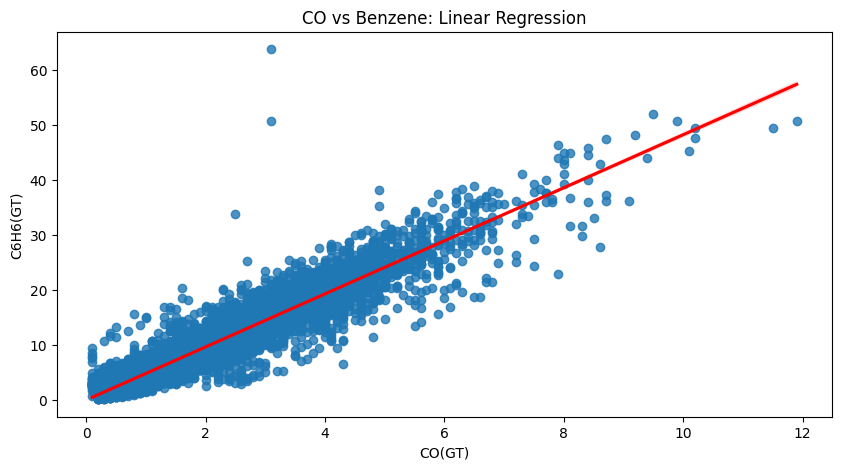


=== Hypothesis 2: Seasonal Temperature Effects ===


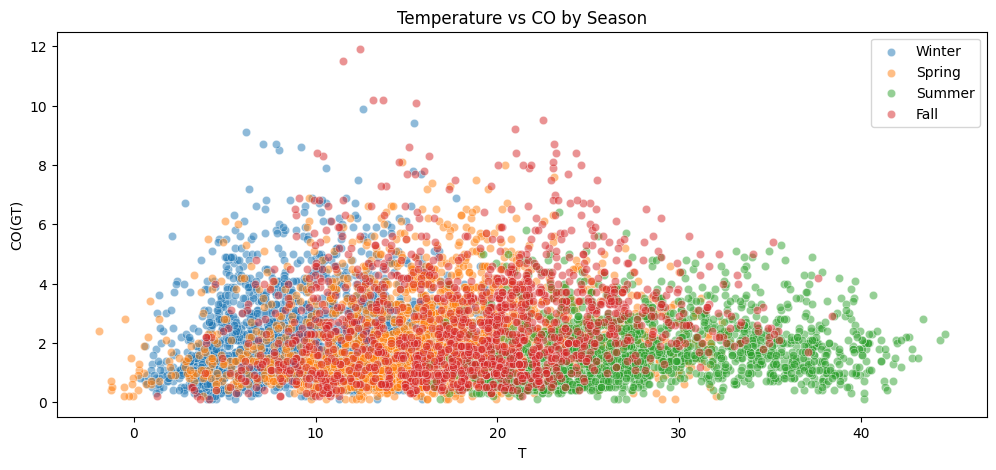


Seasonal Temperature-CO Correlations:
Winter: r = 0.220, p = 0.000
Spring: r = 0.166, p = 0.000
Summer: r = 0.176, p = 0.000
Fall: r = 0.151, p = 0.000

=== Hypothesis 3: Weekday vs Weekend Patterns ===


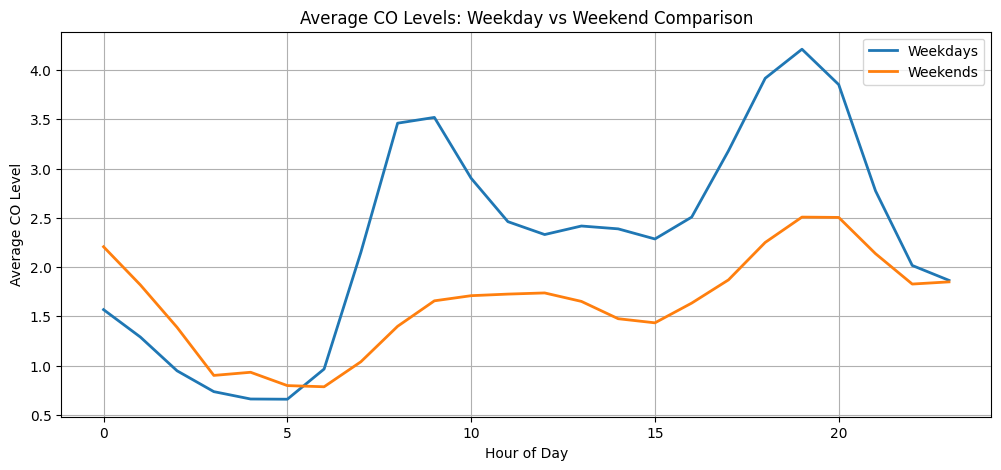


Morning Rush Hour (7-9AM) Comparison:
Weekday mean: 3.04
Weekend mean: 1.37
t-test: t = 22.07, p = 0.000


In [ ]:

import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression

# Load and clean data
data = pd.read_excel('AirQualityUCI.xlsx')
data.replace(-200, np.nan, inplace=True)
data.dropna(subset=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH'], inplace=True)
data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))
data['Month'] = data['DateTime'].dt.month
data['Hour'] = data['DateTime'].dt.hour
data['Weekday'] = data['DateTime'].dt.weekday < 5  # True=Weekday, False=Weekend

# Hypothesis 1: Formal regression analysis for CO vs Benzene
print("\n=== Hypothesis 1: CO vs Benzene Regression ===")
X = data['CO(GT)'].values.reshape(-1, 1)
y = data['C6H6(GT)'].values

# Linear regression
model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)
print(f"R-squared: {r_sq:.3f}")
print(f"Coefficient: {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")

# Statsmodels for detailed output
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

# Plot regression
plt.figure(figsize=(10, 5))
sns.regplot(x='CO(GT)', y='C6H6(GT)', data=data, line_kws={'color':'red'})
plt.title('CO vs Benzene: Linear Regression')
plt.show()

# Hypothesis 2: Seasonal temperature effects
print("\n=== Hypothesis 2: Seasonal Temperature Effects ===")
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

plt.figure(figsize=(12, 5))
for season, months in seasons.items():
    seasonal_data = data[data['Month'].isin(months)]
    sns.scatterplot(x='T', y='CO(GT)', data=seasonal_data, label=season, alpha=0.5)
plt.title('Temperature vs CO by Season')
plt.legend()
plt.show()

# Seasonal correlations
print("\nSeasonal Temperature-CO Correlations:")
for season, months in seasons.items():
    seasonal_data = data[data['Month'].isin(months)]
    corr, p = stats.pearsonr(seasonal_data['T'], seasonal_data['CO(GT)'])
    print(f"{season}: r = {corr:.3f}, p = {p:.3f}")

# Hypothesis 3: Weekday vs Weekend patterns
print("\n=== Hypothesis 3: Weekday vs Weekend Patterns ===")
weekday_co = data[data['Weekday']].groupby('Hour')['CO(GT)'].mean()
weekend_co = data[~data['Weekday']].groupby('Hour')['CO(GT)'].mean()

plt.figure(figsize=(12, 5))
weekday_co.plot(label='Weekdays', linewidth=2)
weekend_co.plot(label='Weekends', linewidth=2)
plt.title('Average CO Levels: Weekday vs Weekend Comparison')
plt.xlabel('Hour of Day')
plt.ylabel('Average CO Level')
plt.legend()
plt.grid()
plt.show()

# Test morning rush hour difference (7-9 AM)
morning_weekday = data[(data['Weekday']) & (data['Hour'].between(7,9))]['CO(GT)']
morning_weekend = data[(~data['Weekday']) & (data['Hour'].between(7,9))]['CO(GT)']
t_stat, p_value = stats.ttest_ind(morning_weekday, morning_weekend, equal_var=False)
print(f"\nMorning Rush Hour (7-9AM) Comparison:")
print(f"Weekday mean: {morning_weekday.mean():.2f}")
print(f"Weekend mean: {morning_weekend.mean():.2f}")
print(f"t-test: t = {t_stat:.2f}, p = {p_value:.3f}")

This analysis tested three hypotheses regarding air pollution patterns, focusing on relationships between CO and Benzene levels, seasonal temperature effects on CO, and differences in CO concentrations during morning rush hours on weekdays versus weekends.

CO vs. Benzene Regression
A strong positive correlation was observed between CO and Benzene levels (R² = 0.865), indicating that CO concentrations explain 86.5% of the variance in Benzene levels. The regression coefficient (4.818) suggests that Benzene levels increase significantly with rising CO levels. This supports the hypothesis that CO emissions can serve as a predictor for Benzene pollution, likely due to their shared sources, such as vehicle emissions and industrial activity.

Seasonal Temperature-CO Correlations
Temperature was found to be weakly but significantly correlated with CO levels across all seasons. The correlation was highest in winter (r = 0.220) and lowest in fall (r = 0.151), with all correlations being statistically significant (p < 0.001). These results suggest that colder temperatures may contribute to higher CO concentrations, potentially due to reduced atmospheric dispersion and increased combustion activity in winter.

Morning Rush Hour CO Levels
A significant difference in CO concentrations was observed between weekday and weekend morning rush hours (t = 22.07, p < 0.001). The weekday mean CO level (3.04) was more than twice that of the weekend mean (1.37), supporting the hypothesis that weekday traffic congestion leads to higher CO pollution levels during peak commuting hours.

Conclusion
The findings confirm the expected relationships between CO and Benzene, seasonal temperature effects on CO, and traffic-induced CO fluctuations. The strong correlation between CO and Benzene suggests that CO could be a useful indicator for monitoring Benzene pollution. Seasonal temperature effects, while present, appear to have only a modest influence on CO levels. The sharp contrast in weekday and weekend rush hour CO concentrations highlights the impact of urban traffic patterns on air quality. Future research could explore additional factors such as wind speed, humidity, and vehicle types to refine these insights and develop targeted pollution control strategies.